# Seattle Library Checkouts Project
**Author: Grace Finlayson**

## Purpose

The purpose of this jupyter notebook is to analyze just under 5 years of checkout data available from the Seattle library. Some goals are to understand client patterns by considering which genres, authors, and types of books are most popular, as well as study which other products offered by the library such as movies and CDs are popular. This information can be used by administrators to decide which types of products the library should buy more of, and which may be underutilized.

This project will be my first contribution to a data analysis portfolio in the hopes of eventually transitioning into data science.

### Main Questions

- How many check outs occured each year?
- What type of item (CD, book, etc.) were the checked out items each year?
- 

## Import Data and Packages

**Warning:** It may take a minute to import the csv files due to their size.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datatype_dict={'UsageClass': 'string', 'MaterialType': 'string', 'CheckoutYear': 'int64', 'CheckoutMonth': 'int64', 'Checkouts': 'int64', 'Title': 'string', 'ISBN': 'string', 'Creator': 'string', 'Subjects': 'string'}

checkouts_2020 = pd.read_csv('kaggle_files/Checkouts_by_Title_2020.csv', dtype = datatype_dict)
checkouts_2021 = pd.read_csv('kaggle_files/Checkouts_by_Title_2021.csv', dtype = datatype_dict)
checkouts_2022 = pd.read_csv('kaggle_files/Checkouts_by_Title_2022.csv', dtype = datatype_dict)
checkouts_2023 = pd.read_csv('kaggle_files/Checkouts_by_Title_2023.csv', dtype = datatype_dict)
checkouts_2024 = pd.read_csv('kaggle_files/Checkouts_by_Title_2024.csv', dtype = datatype_dict)

In [4]:
checkouts = pd.concat([checkouts_2020, checkouts_2021, checkouts_2022, checkouts_2023, checkouts_2024], ignore_index=True)
checkouts.head()

,UsageClass,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects
0,Physical,BOOK,2020,8,1,Harvest / Sam Inglis.,<NA>,"Inglis, Sam",Young Neil 1945 Harvest
1,Digital,EBOOK,2020,8,1,The Race Beat,<NA>,Gene Roberts,"History, Nonfiction, Politics, Sociology"
2,Digital,EBOOK,2020,8,5,I Can Cook Vegan,<NA>,Isa Chandra Moskowitz,"Cooking & Food, Nonfiction"
3,Digital,EBOOK,2020,8,1,Follow the Stars Home,<NA>,Luanne Rice,"Fiction, Romance"
4,Digital,EBOOK,2020,8,1,Blood of Innocence,<NA>,Tami Dane,"Fantasy, Fiction, Romance"


## How Many Checkouts Ocurred Each Year?

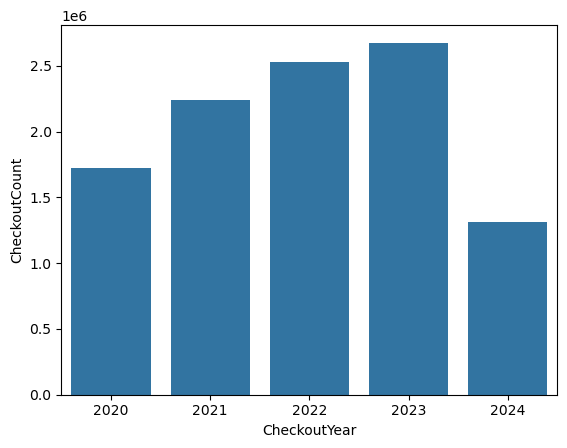

<Figure size 640x480 with 0 Axes>

In [5]:
checkouts_per_year = checkouts[['CheckoutYear','Title']].groupby(by='CheckoutYear', as_index=False).count().rename(columns={'Title':'CheckoutCount'})

sns.barplot(data = checkouts_per_year, x = 'CheckoutYear', y = 'CheckoutCount')
plt.show()
plt.clf()